# Load Packages

In [388]:
import numpy as np
import pandas as pd
from scipy import stats

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer

# Pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

# Model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn import set_config
# set_config(display='diagram')

import warnings
# warnings.filterwarnings('ignore')

# Load Data

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png" width=600>

## Load RAW data

In [10]:
# set data source
data_url = 'data/train.csv'

# set index column
index_col = 'Id'

# load data
data = pd.read_csv(data_url, index_col=index_col)
data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Feature-Target split

In [222]:
# define the target column in the train dataset
target = 'SalePrice'

# split columns into X and y
X = data.drop(columns = target).copy()
y = data[target]

# check the shape of the data
print(f'shape of X is \033[94m{X.shape}\033[0m, shape of y is \033[94m{y.shape}\033[0m')

shape of X is (1460, 79), shape of y is (1460,)


## Missing Values

> Data Readme
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

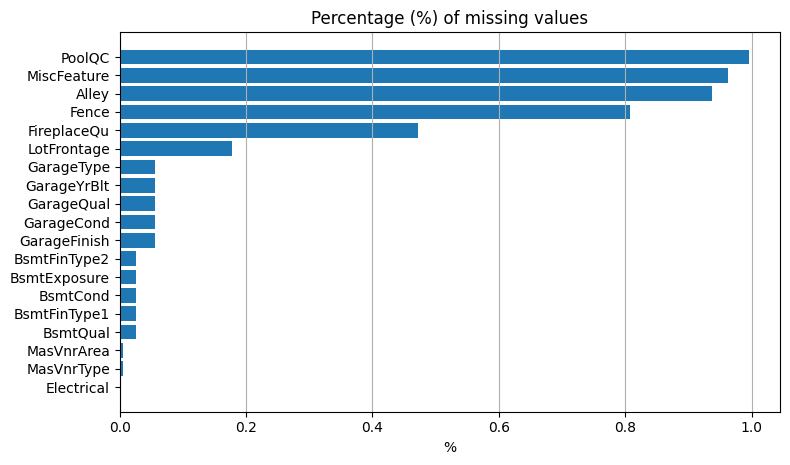

In [223]:
#filter all the features with missing values
feature_null= X.isnull().mean().sort_values(ascending = False)
feature_null=feature_null[feature_null>0]

# visualize
plt.figure(figsize=(8, feature_null.shape[0]/4))
feature_ranks = range(len(feature_null))
bar = plt.barh(feature_null.index, feature_null.values, label=[str(x) for x in feature_ranks])
plt.gca().invert_yaxis()
plt.xlabel('%')
plt.title("Percentage (%) of missing values")
plt.tight_layout()
plt.grid(axis='x')
plt.show()

## Feature Screening

In [321]:
X = data.drop(columns = target).copy()
features_all = X.columns.sort_values().to_list()

columns_to_drop = [
    #to many missing values
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 
    #
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
    'PoolArea', 'MiscVal', 'BsmtHalfBath', 
    'Condition2', 'RoofMatl', 'Heating', 'KitchenAbvGr',
    'Neighborhood', 'Exterior2nd', 'Exterior1st',
    'Condition1', 'SaleType',
    'Street', 'Utilities',
    'BldgType', 'BsmtExposure', 'BsmtFinType2', 'CentralAir', 
    'Electrical', 'Functional', 'LandContour', 'LandSlope', 
    'LotConfig', 'MSZoning', 'PavedDrive', 
    'GarageCond', 'GarageQual'
]
# columns_to_drop = []
X = X.drop(columns=columns_to_drop)

feature_numerical = X.select_dtypes(exclude='object').columns.sort_values().to_list()

feature_categorical = X.select_dtypes(include='object').columns.sort_values().to_list()

feature_categorical_Ordinal = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'FireplaceQu', 'HeatingQC', 'KitchenQual'
]
feature_categorical_Ordinal.sort()
# feature_categorical_Ordinal=[]

feature_categorical_OneHot = [key for key in feature_categorical 
                              if key not in feature_categorical_Ordinal]

print(f'All features (\033[95m{len(features_all)}\
\033[0m): \033[94m{features_all}\033[0m')

print(f'Features to drop (\033[91m{len(columns_to_drop)}\
\033[0m): \033[94m{columns_to_drop}\033[0m')

print(f'Categorical cat features (\033[95m{len(feature_categorical)}\
\033[0m): \033[94m{feature_categorical}\033[0m')

print(f'Ordinal cat features (\036[95m{len(feature_categorical_Ordinal)}\
\033[0m): \033[94m{feature_categorical_Ordinal}\033[0m')

print(f'None-ordinal cat features (\033[95m{len(feature_categorical_OneHot)}\
\033[0m): \033[94m{feature_categorical_OneHot}\033[0m')

print(f'Numercial features (\033[95m{len(feature_numerical)}\
\033[0m): \033[94m{feature_numerical}\033[0m')

All features (79): ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'ScreenPorch', 'Street'

# Data Exploration

## Distribution of each numerical feature

Numercial features (27): ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'LotArea', 'LotFrontage', 'MSSubClass', 'MasVnrArea', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']


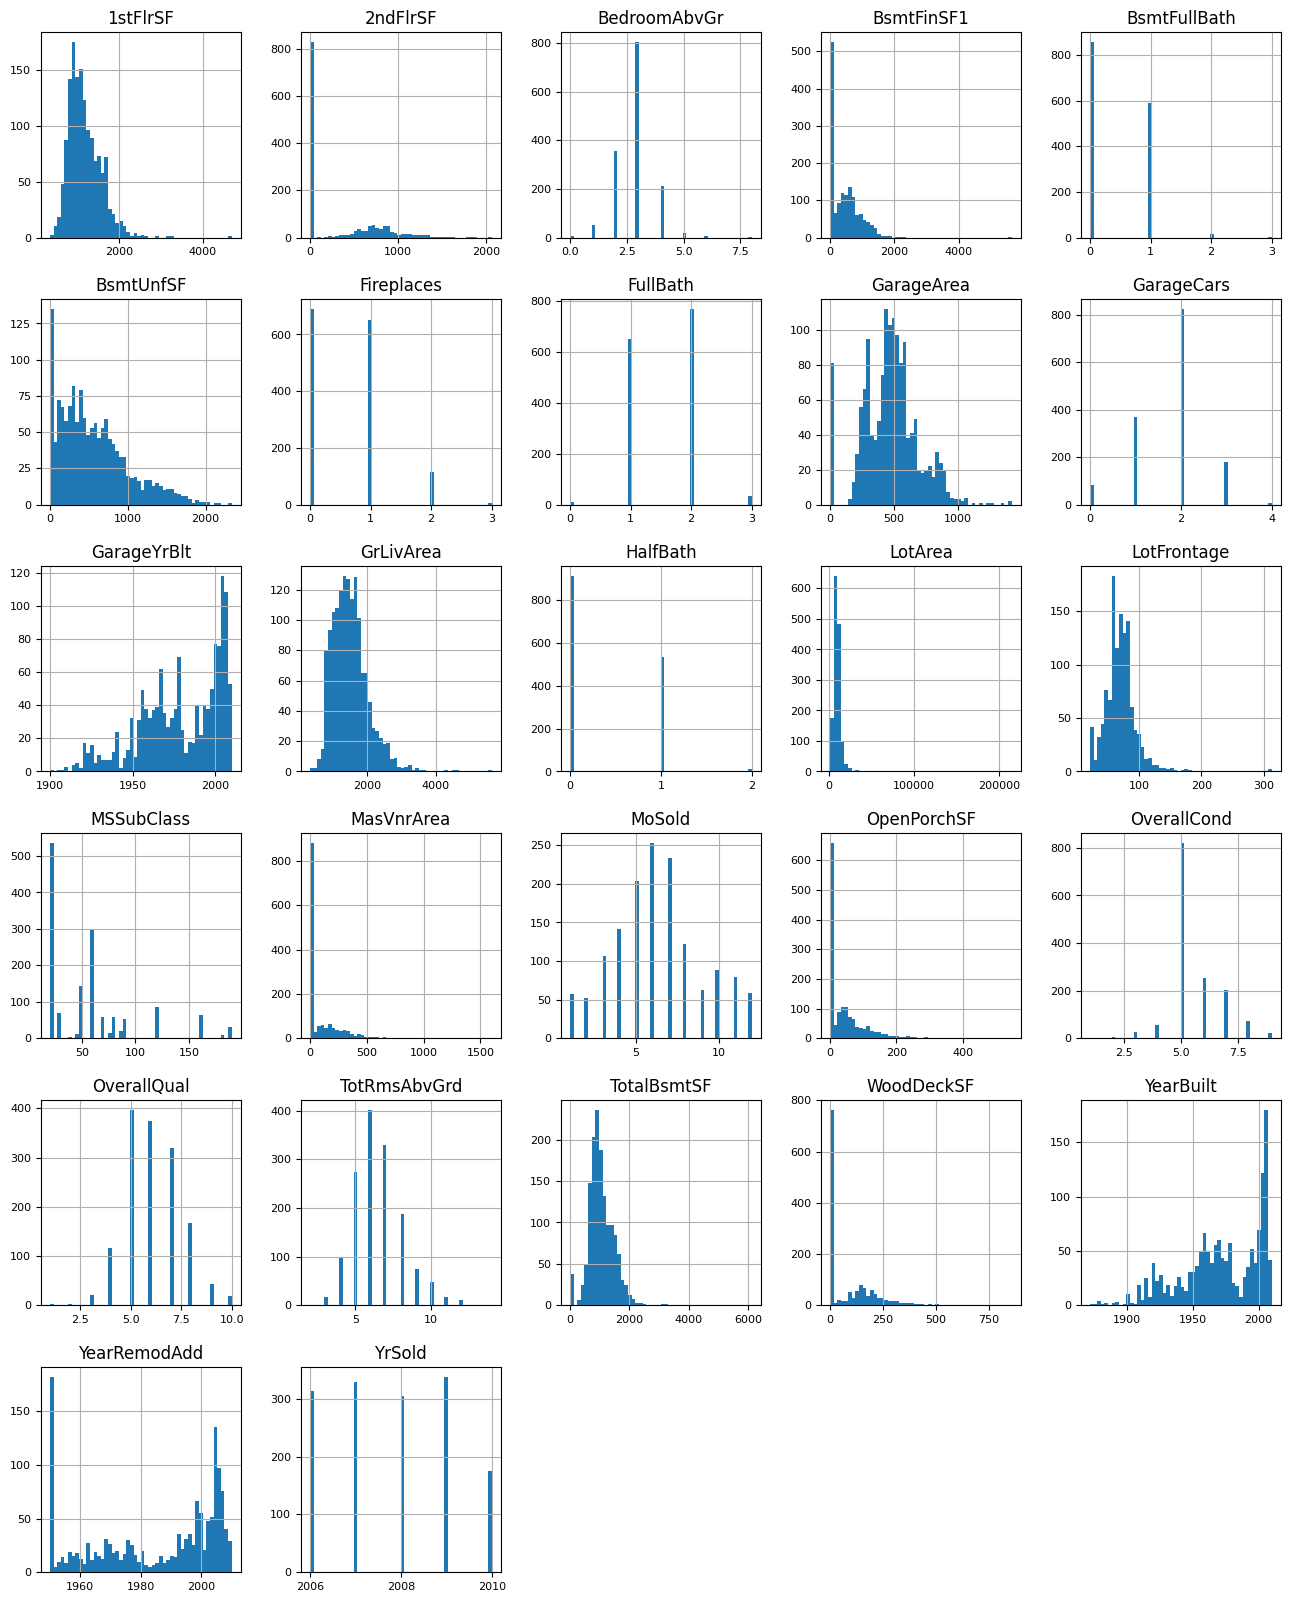

In [225]:
print(f'Numercial features (\033[94m{len(feature_numerical)}\
\033[0m): \033[94m{feature_numerical}\033[0m')

X[feature_numerical].hist(
    figsize=(16, 20), 
    bins=50, 
    xlabelsize=8, 
    ylabelsize=8);

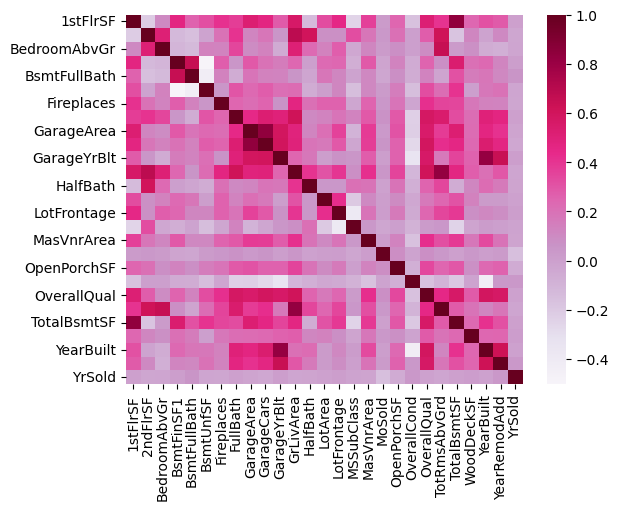

In [381]:
X_num = X[feature_numerical].dropna()

sns.heatmap(X_num.corr(), cmap='PuRd')
pca = PCA()
X_scaled = StandardScaler().fit_transform(X_num)
X_pca = pca.fit_transform(X_scaled)

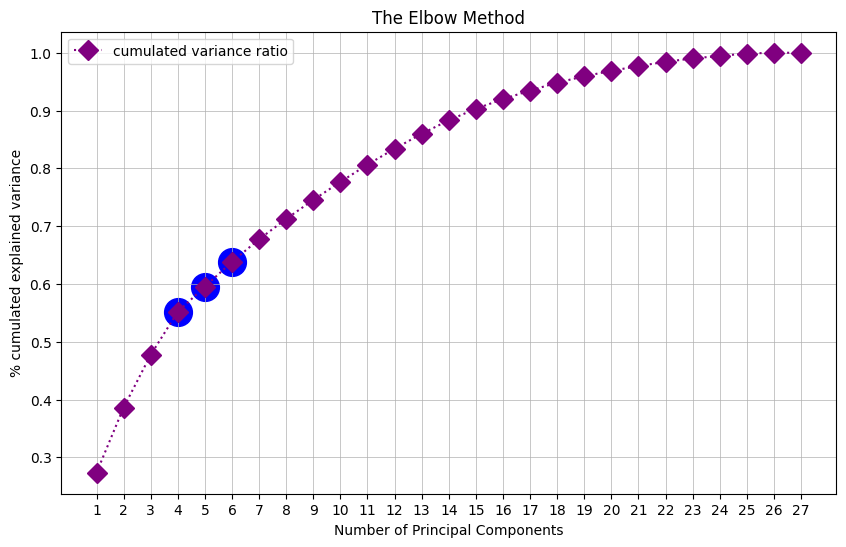

In [382]:
with plt.style.context('seaborn-deep'):
    
    # figsize
    plt.figure(figsize=(10,6))
    
    # getting axes
    ax = plt.gca()
    
    # plotting
    evr_cumulated = np.cumsum(pca.explained_variance_ratio_)
    x_axis_ticks = np.arange(1,evr_cumulated.shape[0]+1)
    ax.plot(x_axis_ticks,evr_cumulated,label="cumulated variance ratio",color="purple",linestyle=":",marker="D",markersize=10)
    
    
    # customizing
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('% cumulated explained variance')
    ax.legend(loc="upper left")
    ax.set_title('The Elbow Method')
    ax.set_xticks(x_axis_ticks)
    ax.scatter(4,evr_cumulated[4-1],c='blue',s=400)
    ax.scatter(5,evr_cumulated[5-1],c='blue',s=400)
    ax.scatter(6,evr_cumulated[6-1],c='blue',s=400)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

## Distribution of each catigorical feature

Categorical cat features (16): ['BsmtCond', 'BsmtFinType1', 'BsmtQual', 'ExterCond', 'ExterQual', 'FireplaceQu', 'Foundation', 'GarageFinish', 'GarageType', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LotShape', 'MasVnrType', 'RoofStyle', 'SaleCondition']


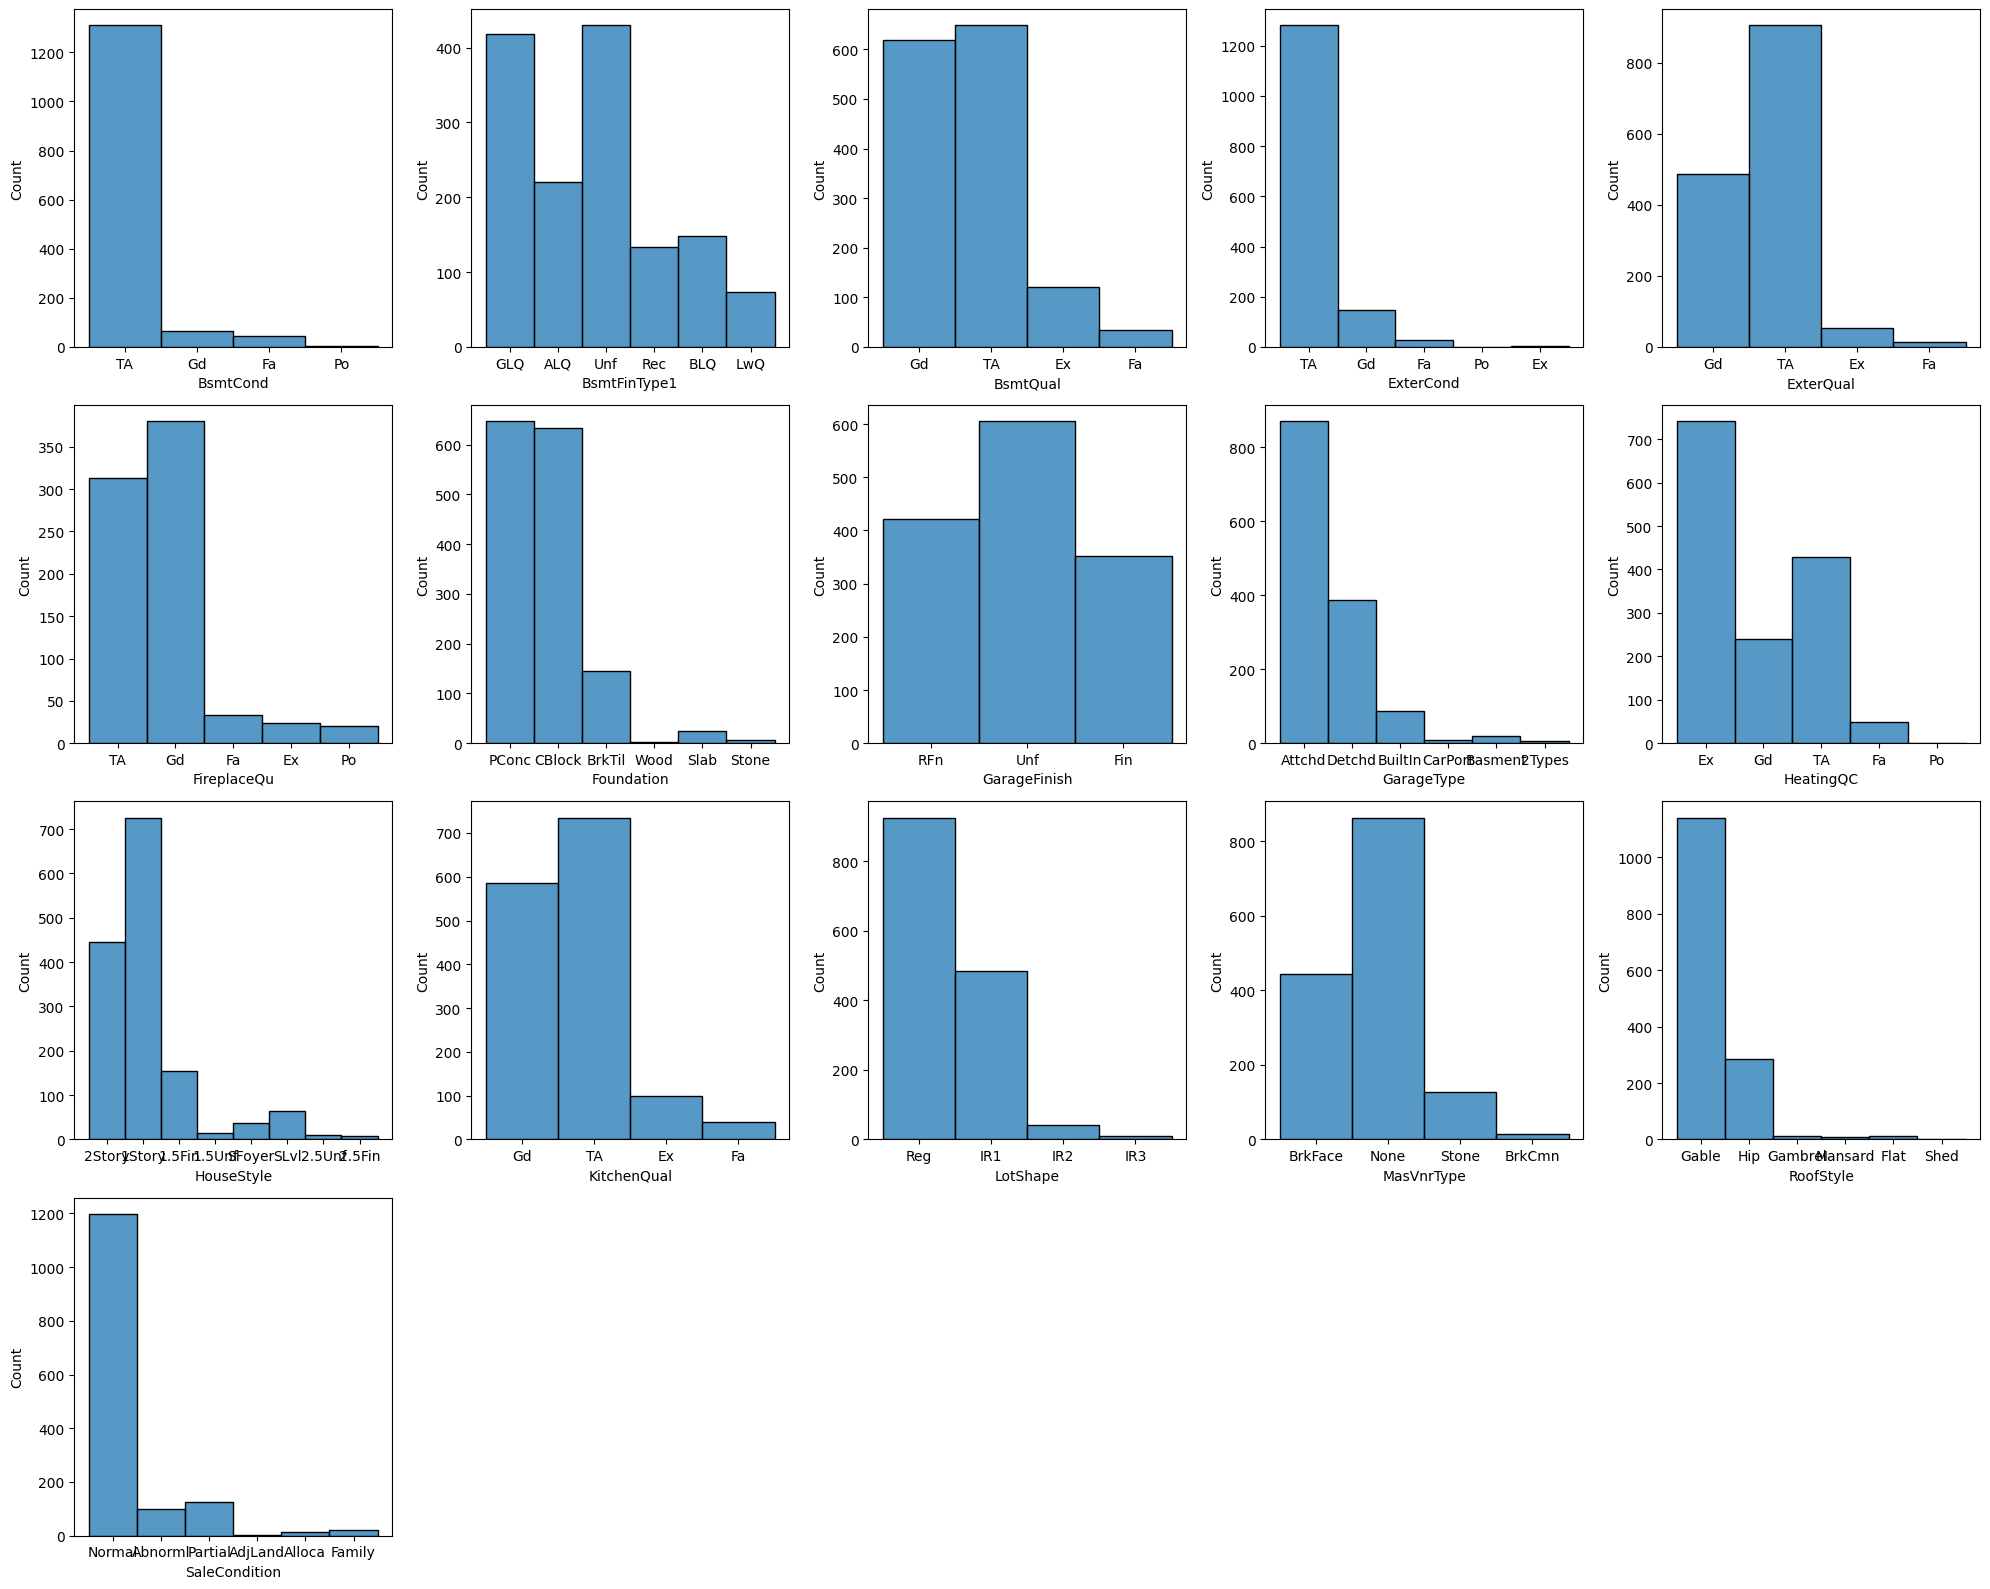

In [322]:
plot_list=feature_categorical

print(f'Categorical cat features (\033[94m{len(plot_list)}\
\033[0m): \033[94m{plot_list}\033[0m')

# Assuming 'X' is your DataFrame
num_cols = 5  # Number of columns in the grid
num_rows = (len(plot_list) - 1) // num_cols + 1  # Number of rows in the grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))

# Plot each categorical feature
for i, feature in enumerate(plot_list):
    ax = axes[i // num_cols, i % num_cols] if num_rows > 1 else axes[i % num_cols]
    sns.histplot(data=X, x=feature, kde=False, ax=ax)

# Hide unused subplots
if len(plot_list) < num_rows * num_cols:
    for j in range(len(plot_list), num_rows * num_cols):
        axes[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()

## Distribution of each catigorical Ordinal feature

Categorical cat features (7): ['BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual', 'FireplaceQu', 'HeatingQC', 'KitchenQual']


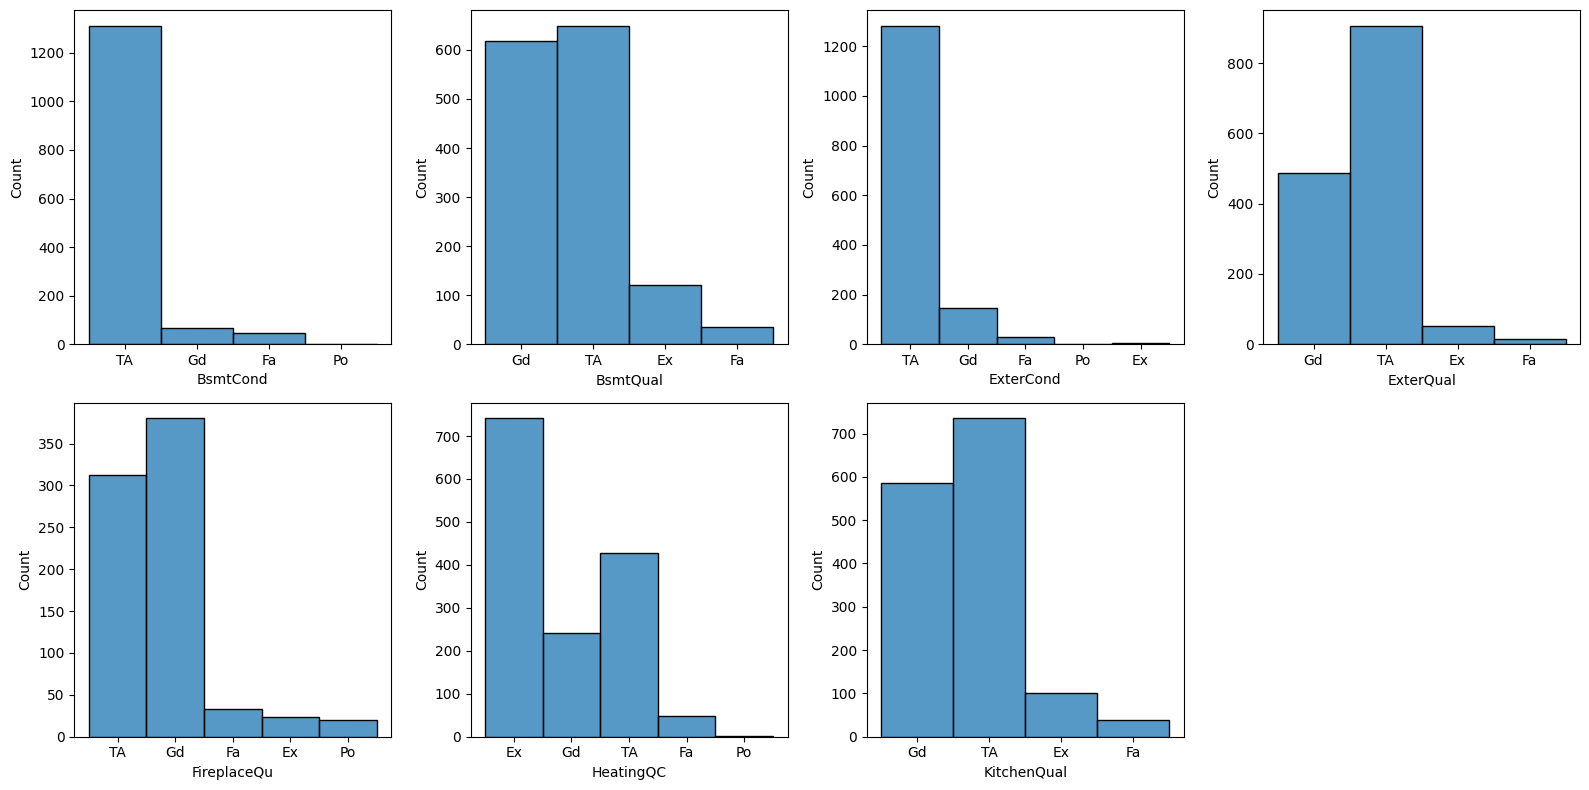

In [323]:
plot_list = feature_categorical_Ordinal

print(f'Categorical cat features (\033[94m{len(plot_list)}\
\033[0m): \033[94m{plot_list}\033[0m')

if len(plot_list)>0:
    # Assuming 'X' is your DataFrame
    num_cols = 4  # Number of columns in the grid
    num_rows = (len(plot_list) - 1) // num_cols + 1  # Number of rows in the grid

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))

    # Plot each categorical feature
    for i, feature in enumerate(plot_list):
        ax = axes[i // num_cols, i % num_cols] if num_rows > 1 else axes[i % num_cols]
        sns.histplot(data=X, x=feature, kde=False, ax=ax)

    # Hide unused subplots
    if len(plot_list) < num_rows * num_cols:
        for j in range(len(plot_list), num_rows * num_cols):
            axes[j // num_cols, j % num_cols].axis('off')

    plt.tight_layout()
    plt.show()

In [324]:
feat_ordinal_dict = {
    # considers "missing" as the worse category
    "BsmtCond": ['missing', 'Po', 'Fa', 'TA', 'Gd'],
#     "BsmtExposure": ['missing', 'No', 'Mn', 'Av', 'Gd'],
#     "BsmtFinType1": ['missing', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
#     "BsmtFinType2": ['missing', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    "BsmtQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
#     "Electrical": ['missing', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],
    "ExterCond": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "ExterQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
#     "Fence": ['missing', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
    "FireplaceQu": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     "Functional": ['missing', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
#     "GarageCond": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     "GarageFinish": ['missing', 'Unf', 'RFn', 'Fin'],
#     "GarageQual": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "HeatingQC": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "KitchenQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex']
#     "LandContour": ['missing', 'Low', 'Bnk', 'HLS', 'Lvl'],
#     "LandSlope": ['missing', 'Sev', 'Mod', 'Gtl'],
#     "LotShape": ['missing', 'IR3', 'IR2', 'IR1', 'Reg'],
#     "PavedDrive": ['missing', 'N', 'P', 'Y'],
#     "PoolQC": ['missing', 'Fa', 'Gd', 'Ex'],
}


ordinal_features = list(feat_ordinal_dict.keys())
ordinal_values = list(feat_ordinal_dict.values())

## Distribution of each catigorical OneHot feature

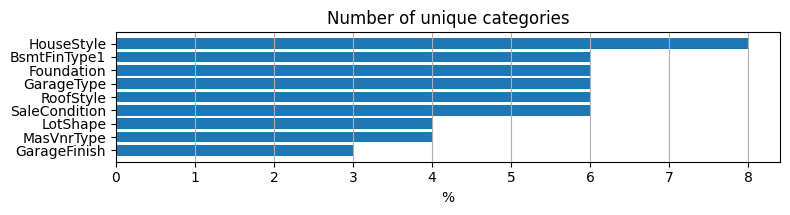

In [265]:
# list the number of categories of each OneHot feature
feature_cat_value_count= X[feature_categorical_OneHot].nunique().sort_values(ascending=False)
feature_cat_value_count=feature_cat_value_count[feature_cat_value_count>0]

# visualize
plt.figure(figsize=(8, feature_cat_value_count.shape[0]/4))
feature_ranks = range(len(feature_null))
bar = plt.barh(feature_cat_value_count.index, feature_cat_value_count.values, label=[str(x) for x in feature_ranks])
plt.gca().invert_yaxis()
plt.xlabel('%')
plt.title("Number of unique categories")
plt.tight_layout()
plt.grid(axis='x')
plt.show()

Categorical cat features (9): ['BsmtFinType1', 'Foundation', 'GarageFinish', 'GarageType', 'HouseStyle', 'LotShape', 'MasVnrType', 'RoofStyle', 'SaleCondition']


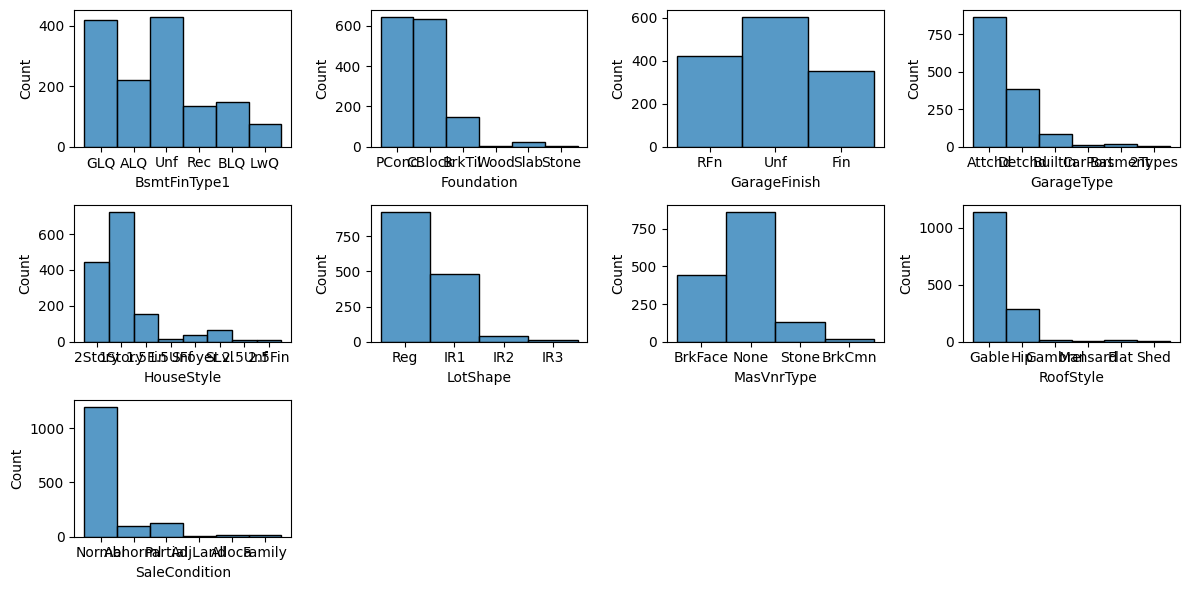

In [266]:
plot_list=feature_categorical_OneHot

print(f'Categorical cat features (\033[94m{len(plot_list)}\
\033[0m): \033[94m{plot_list}\033[0m')

if len(plot_list)>0:
    # Assuming 'X' is your DataFrame
    num_cols = 4  # Number of columns in the grid
    num_rows = (len(plot_list) - 1) // num_cols + 1  # Number of rows in the grid

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(3*num_cols, 2*num_rows))

    # Plot each categorical feature
    for i, feature in enumerate(plot_list):
        ax = axes[i // num_cols, i % num_cols] if num_rows > 1 else axes[i % num_cols]
        sns.histplot(data=X, x=feature, kde=False, ax=ax)

    # Hide unused subplots
    if len(plot_list) < num_rows * num_cols:
        for j in range(len(plot_list), num_rows * num_cols):
            axes[j // num_cols, j % num_cols].axis('off')

    plt.tight_layout()
    plt.show()

# Data Preprocessing

In [410]:
#transformer for numerical data
preproc_num = make_pipeline(
    SimpleImputer(strategy='mean'),
#     RobustScaler()
    StandardScaler(),
    PCA(n_components=20)
)

preproc_cat_ordinal = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='Missing'),
    OrdinalEncoder(
        categories=ordinal_values,
        dtype=np.int64,
        handle_unknown="use_encoded_value",
        unknown_value=-1),
    MinMaxScaler()
)

preproc_cat_onehot = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(
        drop = 'if_binary',
        sparse_output=False,
        handle_unknown='ignore')
)

preproc_pipeline = ColumnTransformer([
    ('ordinal processor', preproc_cat_ordinal, feature_categorical_Ordinal),
    ('numerical processor', preproc_num, feature_numerical),
    ('categorical processor', preproc_cat_onehot, feature_categorical_OneHot),
#     remainder='passthrough'
])


preproc_pipeline.fit(X)

ColumnTransformer(transformers=[('ordinal processor',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['missing',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd'],
                                                                             ['missing',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['missing',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['missing',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['missing',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd'...
                                  'YearBuilt', 'YearRemodAdd', 'YrSold']),
                                ('categorical processor',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['BsmtFinType1', 'Foundation', 'GarageFinish',
                                  'GarageType', 'HouseStyle', 'LotShape',
                                  'MasVnrType', 'RoofStyle',
                                  'SaleCondition'])])

# Model

## Custom Loss Function

In [164]:
def my_rmsle_neg(y_true, y_pred):
    result = -(np.mean((np.log(y_true+1)-np.log(y_pred+1))**2))**0.5
    return result 

from sklearn.metrics import make_scorer
rmsle_neg = make_scorer(my_rmsle_neg)

## Cross Validation

In [411]:
# cv_model = KNeighborsClassifier() #Baseline score: -0.3278517946119624
# cv_model = SVC() #Baseline score: -0.3369862693961591 
# cv_model = SVC(kernel='poly') #Baseline score: -0.2761102147519752 
# cv_model = SVC(kernel='linear') #Baseline score: -0.24822940772121438 
# cv_model = DecisionTreeRegressor(max_depth=6) # Baseline score: -0.20116124161062304
# cv_model = LinearRegression() #Baseline score: -0.17873011648173293 
# cv_model = LogisticRegression(max_iter=2000) #Baseline score: -0.2522674044146145 
cv_model = RandomForestRegressor() # Baseline score: -0.1470104740488312
cv_baseline = make_pipeline(
    preproc_pipeline,
    cv_model
)

cv_result = cross_val_score(
    cv_baseline,
    X, 
    y, 
    cv=5,
    scoring=rmsle_neg,
    n_jobs=-1)
score_baseline=np.mean(cv_result)
print(f'Baseline score: \033[94m{score_baseline}\033[0m \nof \033[94m{type(cv_model)}\033[0m model ')

Baseline score: -0.14742883676858293 
of <class 'sklearn.ensemble._forest.RandomForestRegressor'> model 


/Users/hsun/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Grid/Random Search

### KNN

In [ ]:
knn_pipeline = make_pipeline(
    preproc_pipeline, 
    KNeighborsRegressor()
)

knn_param_grid={
    '__n_neighbors': list(range(1,20,1))
}
knn_search = GridSearchCV(knn_pipeline, 
                      knn_param_grid, 
                      cv=5, 
                      scoring='r2', 
                      n_jobs=-1)
knn_search.fit(X, y)

In [ ]:
knn_best_model = knn_search.best_estimator_
print(knn_search.best_score_)
print(knn_search.best_params_)

### Random Foreast

In [412]:
rf_pipeline = Pipeline([
    ('preprocessing', preproc_pipeline),
    ('modelling', RandomForestRegressor(n_jobs=-1))
])

rf_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal processor',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['missing',
                                                                                               'Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd'],
                                                                                              ['missing',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['missing',
                                                                                               'Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['missing',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['BsmtFinType1', 'Foundation',
                                                   'GarageFinish', 'GarageType',
                                                   'HouseStyle', 'LotShape',
                                                   'MasVnrType', 'RoofStyle',
                                                   'SaleCondition'])])),
                ('modelling', RandomForestRegressor(n_jobs=-1))])

In [413]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# Random search 
rf_random_search = RandomizedSearchCV(
    rf_pipeline, 
    param_distributions ={
        'modelling__max_depth': randint(15,30),
        'modelling__min_samples_split' : randint(2,5)},
    cv=5,
    n_iter = 10,
    scoring=rmsle_neg,
    n_jobs=-1
    )

rf_random_search.fit(X,y)

rf_tuned_pipe = rf_random_search.best_estimator_

/Users/hsun/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/hsun/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/hsun/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/hsun/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be en

In [409]:
rf_random_search.best_score_

-0.1469930952581059

### SVM